### 2. Analysis patient data
We will use a library called **Numpy** to analyse the patient data. 
**Numpy** stands for Numerical Python and it has plenty functions to operate with lots of numbers or more complex data structures such as lists, arrays and matrices.<br>
Prior to use a library we need to import it


In [ ]:
# import numpy  - we can also use an alias, import numpy as np

In [1]:
import numpy as np

In [4]:
# let's load the data
np.loadtxt(fname='./swc-python/data/inflammation-01.csv', delimiter=',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [27]:
# let's assign the data to a vraible so we can operate with it
data = np.loadtxt(fname='./swc-python/data/inflammation-01.csv', delimiter=',')

In [ ]:
# print the content
# print(data)

In [ ]:
# let’s ask what type of thing data refers to:


A **Numpy** array contains one or more elements of the same type. The type function will only tell you that a variable is a NumPy array but won’t tell you the type of thing inside the array. We can find out the type of the data contained in the NumPy array using *dtype*.

In [ ]:
# print(data.dtype)

The inflammation data stores patient records, each row represent a patient and each column a day.
Intuitively, we can thik of a 'excel table'. We can use the property *shape* to know how many rows and columns an array has

In [ ]:
print()

If we want to get a single number from the array, we must provide an index in square brackets after the variable name, just as we do in math when referring to an element of a matrix. Our inflammation data has two dimensions, so we will need to use two indices to refer to one specific value:

In [ ]:
# print('first value in data:', data[0,0]) - please note the index starts at 0
# The expression data[29, 19] accesses the element at row 30, column 20
print('first value in data:', data[0,0])

In [ ]:
Programming languages like Fortran, MATLAB and R start counting at 1 because that’s what human beings have done for thousands of years. Languages in the C family (including C++, Java, Perl, and Python) count from 0 because it represents an offset from the first value in the array (the second value is offset by one index from the first value)<br>
<img src="python-zero-index.svg" width="600">

#### Slicing data
An index like [30, 20] selects a single element of an array, but we can select whole sections as well. For example, we can select the first ten days (columns) of values for the first four patients (rows) like this:

In [ ]:
# print(data[0:4, 0:10])

We don’t have to start slices at 0:

In [ ]:
# print(data[5:10, 0:10])

We also don’t have to include the upper and lower bound on the slice. If we don’t include the lower bound, Python uses 0 by default; if we don’t include the upper, the slice runs to the end of the axis, and if we don’t include either (i.e., if we use ‘:’ on its own), the slice includes everything:


In [ ]:
small = data[:3, 36:]
print('small is:')
print(small)

#### Analysing data
NumPy has several useful functions that take an array as input to perform operations on its values. If we want to find the average inflammation for all patients on all days, for example, we can ask NumPy to compute data’s **mean** value --> np.mean()

Similarly, we can calculate max (*amax*), min (*amin*) and standard deviation (*std*)
NumPy adopted names such as amax and amin to differentiate from the standard native *max* and *min* functions.

In [ ]:
# code here to assign maxval, minval and stdval in one line

# print the values

We can print the value of max or similar without using a variable


In [ ]:
# code here to print the value of max without using a veriable

How did we know what functions NumPy has and how to use them? If you are working in IPython or in a Jupyter Notebook, there is an easy way to find out. If you type the name of something followed by a dot, then you can use **tab** completion (e.g. type numpy. and then press Tab) to see a list of all functions and attributes that you can use. After selecting one, you can also add a question mark (e.g. numpy.cumprod?), and you will obtain an explanation of the method! This is the same as doing help(numpy.cumprod). Similarly, if you are using the “plain vanilla” Python interpreter, you can type numpy. and press the **Tab** key twice for a listing of what is available. You can then use the **help()** function to see an explanation of the function you’re interested in, for example: **help(numpy.cumprod)**

In [ ]:
# exercise:  Print the maximum inflammation for patient 2
# hint slice data [2,:]

What if we need the maximum inflammation for each patient over all days (as in the next diagram on the left) or the average for each day (as in the diagram on the right)? As the diagram below shows, we want to perform the operation across an axis. <br>
To support this functionality, most array functions allow us to specify the axis we want to work on<br>
<img src="python-operations-across-axes.png" width="600">

In [ ]:
# axis=1 --> by rows, axis 0 --> by columns
# print the mean of the data by columns (per day)
# print(numpy.mean(data, axis=0))

In [ ]:
# print the shape of the result

The expression (40,) tells us we have an N×1 vector, so this is the average inflammation per day for all patients

In [ ]:
# compute the mean by columns  --> axis =1 


In [ ]:
# print the shape of the result


In [ ]:
*Question*: How can we interpret the result?

#### Stacking arrays
Arrays can be concatenated and stacked on top of one another, using NumPy’s vstack and hstack functions for vertical and horizontal stacking, respectively.

In [9]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('A = ')
print(A)

B = np.hstack([A, A])
print('B = ')
print(B)

C = np.vstack([A, A])
print('C = ')
print(C)

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
B = 
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]
 [7 8 9 7 8 9]]
C = 
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]
 [4 5 6]
 [7 8 9]]


In [6]:
A

NameError: name 'A' is not defined

*Exercise* <br>
Write a code that slices the first and last columns of A, and stacks them into a 3x2 array. Make sure to print the results to verify your solution.<br>
A ‘gotcha’ with array indexing is that singleton dimensions are dropped by default. That means A[:, 0] is a one dimensional array, which won’t stack as desired. To preserve singleton dimensions, the index itself can be a slice or array. For example, A[:, :1] returns a two dimensional array with one singleton dimension (i.e. a column vector).

In [18]:
# A[:,:1]  => All the rows, all the rows the first column
# A[:,-1:] => All the rows, all the rows the last column
# D = numpy.hstack((A[:, :1], A[:, -1:]))

In [24]:
A[:,-1:]

array([[3],
       [6],
       [9]])

#### Changes in time
For many variables, the change in its values over time is a meaningful insight.
The numpy *diff* function takes an aarray and returns the difference between two successive values<br>
Let’s find out how to calculate changes in the data contained in an array with NumPy.

In [36]:
# print the data for patient 3 week 1 -->


In [37]:
# compute the diff for that period --> np.diff()
np.diff(data[2,:7])

array([ 1.,  0.,  2.,  0., -1.,  4.])

**Key points**
<ul>
    <li>
      Import a library into a program using import libraryname.  
    </li>
    <li>
       Use the numpy library to work with arrays in Python. 
    </li>
    <li>
       The expression array.shape gives the shape of an array. 
    </li>
    <li>
      Use array[x, y] to select a single element from a 2D array.
    </li>
    <li>
      Use numpy.mean(array), numpy.amax(array), and numpy.amin(array) to calculate simple statistics.
    </li>
    <li>
      Use numpy.mean(array, axis=0) or numpy.mean(array, axis=1) to calculate statistics across the specified axis.
    </li>
    <li>
      Array indices start at 0, not 1.
    </li>
    <li>
      Use low:high to specify a slice that includes the indices from low to high-1.
    </li>
    
</ul>

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\AggreyOA\AppData\Local\Temp\ipykernel_4328\743883080.py:4: SyntaxWarning: invalid escape sequence '\d'
  data=np.loadtxt(fname="swc-python\data\inflammation-01.csv",delimiter=",")


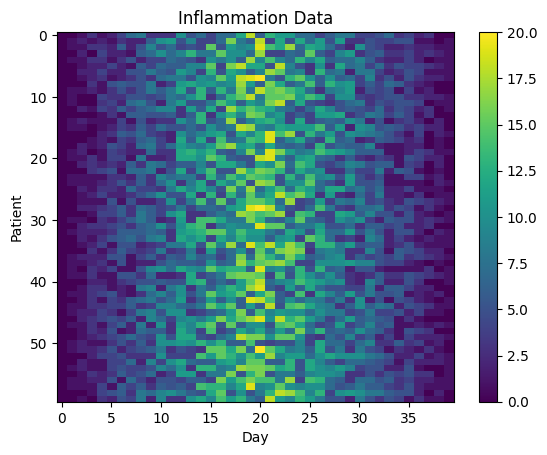

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt(fname="swc-python\data\inflammation-01.csv",delimiter=",")
plt.imshow(data, aspect='auto')
plt.colorbar()
plt.title('Inflammation Data')
plt.xlabel('Day')
plt.ylabel('Patient')
plt.show()